In [4]:
using OrdinaryDiffEq, DiffEqFlux, Plots

function lotka_volterra(u, p, t)
    α, β, δ, γ = p
    🐰, 🦊 = u
    return [🐰 * (α - β * 🦊), -🦊 * (γ - δ * 🐰)]
end

# Initial condition
u0 = [1.0, 1.0]

# Simulation interval and intermediary points
tspan = (0.0, 10.0)
tsteps = 0.0:0.2:10.0

# LV equation parameter. p = [α, β, δ, γ]
p = [1.5, 1.0, 3.0, 1.0]

# Setup the ODE problem, then solve
prob = ODEProblem(lotka_volterra, u0, tspan, p)
sol = solve(prob, Midpoint())

function loss(p)
  sol = solve(prob, Midpoint(), p=p, saveat = tsteps)
  loss = sum(abs2, sol.-1)
  return loss, sol
end

callback = function (p, l, pred)
  display(l)
  plt = plot(pred, ylim = (0, 6))
  display(plt)
  # Tell sciml_train to not halt the optimization. If return true, then
  # optimization stops.
  return false
end

#3 (generic function with 1 method)

In [5]:
using Flux

125.25955165661651

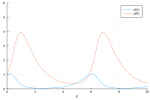

118.98029642839522

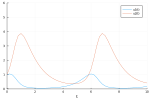

113.08370204741026

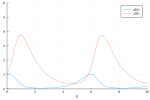

107.55082000077265

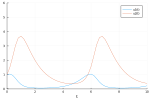

102.36311238152477

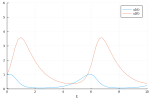

97.50196316731869

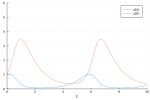

92.94923899943498

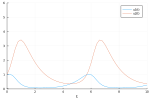

88.68713507211318

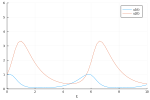

84.69851998232942

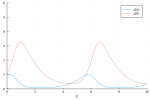

80.96649590965933

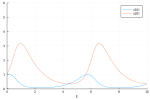

77.47501034913489

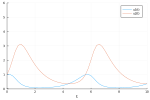

74.2085772124141

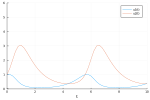

71.1523568496798

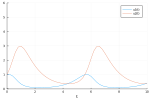

68.29228517671743

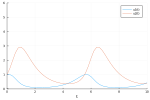

65.61479740491488

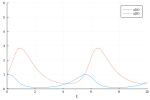

63.10721004099917

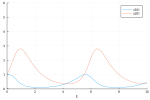

60.75737440769294

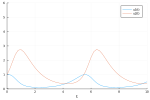

58.55389294803927

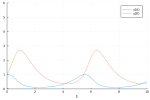

56.4860160224821

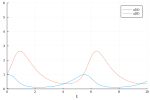

54.543553623856006

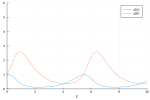

52.717009407831625

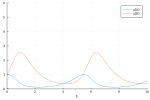

50.99743910257615

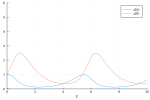

49.37648967316271

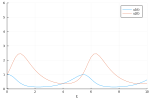

47.846297415396855

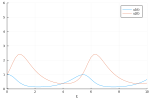

46.39960837649445

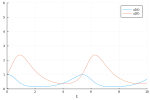

45.02955148318925

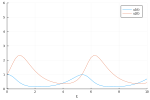

43.729849843489255

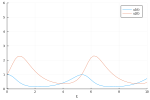

42.494543133634686

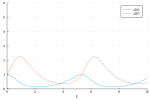

41.31823221993362

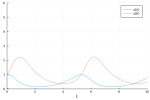

40.195764406658625

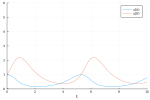

39.12254384043575

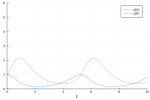

38.094227218817345

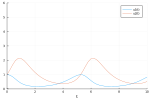

37.1068118773274

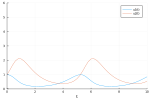

36.1566894228167

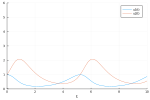

35.24056577311969

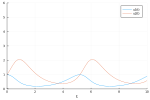

34.35545467319089

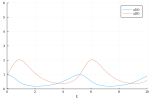

33.49863625445482

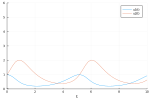

32.66771997695631

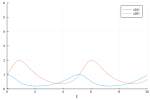

31.860608815435373

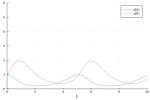

31.075515680750637

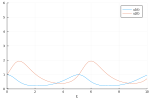

30.310933789891983

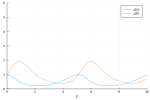

29.56560328082413

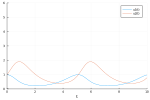

28.838601821672196

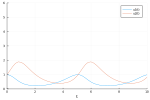

28.129227895331493

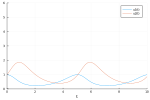

27.437047023433486

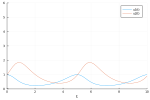

26.76186829382899

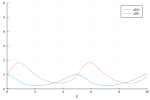

26.103681687448233

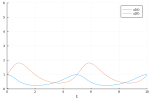

25.462621811295392

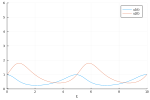

24.838917273760448

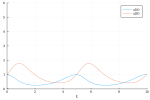

24.232861449718776

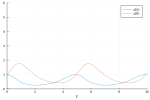

24.232861449718776

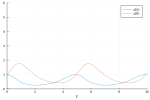

23.644700532598836

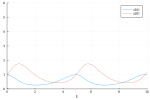

1.7272290602706013

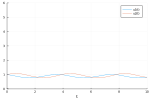

0.49262093142290286

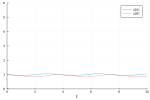

0.271528523638026

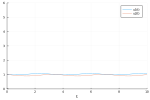

0.0023140477720929907

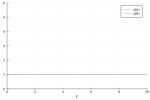

0.00010960687133339923

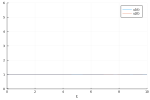

1.5903956185747034e-6

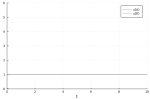

1.449597714291814e-16

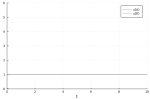

u: 4-element Vector{Float64}:
 1.384995620746647
 1.3849956207386735
 2.1485330340551325
 2.1485330340543105

In [8]:
res = DiffEqFlux.sciml_train(loss, p, cb = callback, maxiters = 50)

In [9]:
res.u

4-element Vector{Float64}:
 1.384995620746647
 1.3849956207386735
 2.1485330340551325
 2.1485330340543105